In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire',
        'gender', 'reside']]  # Feature
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [4]:
y = df['custcat'] # Target
y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
Feature = X.copy()
Target  = y.copy()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(Feature,Target,shuffle=True,random_state=123,test_size=0.50)

In [8]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (500, 11) (500,)
Test set: (500, 11) (500,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [11]:
neigh =KNN.fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [13]:
New_data = df.iloc[0]
New_data

region      2.0
tenure     13.0
age        44.0
marital     1.0
address     9.0
income     64.0
ed          4.0
employ      5.0
retire      0.0
gender      0.0
reside      2.0
custcat     1.0
Name: 0, dtype: float64

In [14]:
New_data_values = New_data.values
New_Customer = New_data_values[0:11]
New_Customer

array([ 2., 13., 44.,  1.,  9., 64.,  4.,  5.,  0.,  0.,  2.])

In [18]:
predication_For_new_customer = neigh.predict([New_Customer])
predication_For_new_customer

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [19]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 3, 2, 1, 3], dtype=int64)

In [20]:
Compare = pd.DataFrame(X_test,columns=df.columns[0:11])
Compare['Predicated'] = yhat
Compare['Actual_data'] = pd.Series(y_test)
Compare

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,Predicated,Actual_data
131,2,7,35,1,0,47.0,1,14,0.0,0,5,2,1
203,2,63,63,1,19,191.0,3,27,0.0,0,2,3,2
50,2,30,34,1,4,27.0,2,1,0.0,0,5,2,1
585,3,44,45,1,19,88.0,1,21,0.0,0,2,1,3
138,3,23,25,1,6,38.0,2,1,0.0,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1,9,28,1,8,28.0,3,4,0.0,0,3,1,2
408,3,39,34,0,2,54.0,3,5,0.0,0,1,4,1
468,1,65,59,1,27,197.0,4,26,0.0,0,2,3,2
989,1,44,56,0,4,63.0,2,6,0.0,1,1,4,3


In [21]:
from sklearn import metrics

In [22]:
train_Set_accueacy = metrics.accuracy_score(y_train,neigh.predict(X_train))
print("Train set Accuracy: ",train_Set_accueacy*100)

Train set Accuracy:  49.8


In [23]:
test_set_accuaracy = metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ",test_set_accuaracy*100)

Test set Accuracy:  31.0


In [24]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.52
Test set Accuracy:  0.302


In [25]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

In [26]:
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

In [27]:
std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
std_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02086145])

In [28]:
mean_acc

array([0.3  , 0.308, 0.3  , 0.284, 0.31 , 0.302, 0.328, 0.342, 0.32 ])

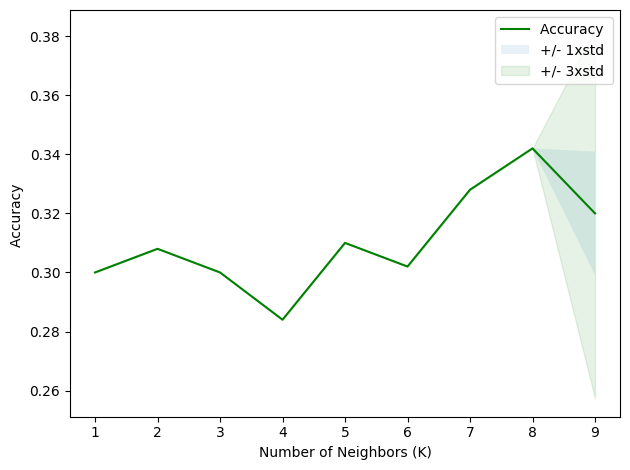

In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.342 with k= 8


Minimum error:- 0.626 at K = 12


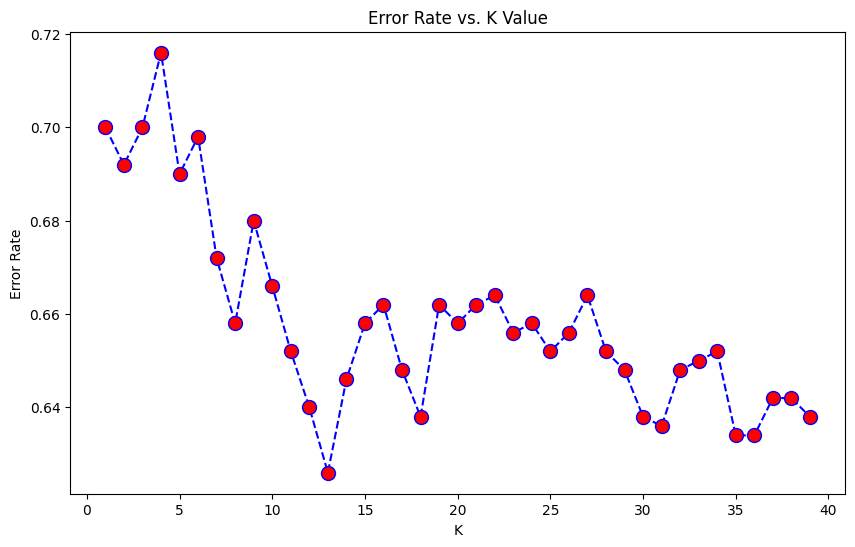

In [31]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))